<a href="https://colab.research.google.com/github/Aegis-PC/Loan-eligibility-analysis/blob/main/PDA_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1 - Loan Data Automation**

Here is a Few things to know:

To run the code in this notebook, you will need a Google account and access to Google Colab. If you don't have a Google account, you can create one here.

To access Google Colab, go to https://colab.research.google.com/ and sign in using your Google account credentials. Once you're signed in, you can create a new notebook by clicking on the "New Notebook" button on the left side of the screen.


**Download the dataset from BPP course module**



## **To run the code in this notebook, follow these steps:**


*   Open the notebook file in Google Colab.
*   Make sure you have an active internet connection.
*   Select "Runtime" from the menu at the top of the screen, and then select "Run all" to run all the cells in the notebook.

Alternatively, you can run the cells one by one by clicking on the play button next to each cell.

### **Installing Tabula for PDF parsing.**

In [ ]:
!pip install pandas matplotlib openpyxl tabula-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 35.9 MB/s eta 0:00:00


### **Importing the required libraries.**

In [ ]:
import pandas as pd
import numpy as np
import tabula
import seaborn as sns
import matplotlib.pyplot as plt

### **Loading Dataset**

In [ ]:
#Loading data from the Excel file

from google.colab import files
loan_excel = files.upload()

Saving PDA - Zappy Loan Data (21).xlsx to PDA - Zappy Loan Data (21).xlsx


In [ ]:
#Loading data from the pdf file

from google.colab import files
loan_pdf = files.upload()
loan_pdf = 'PDA - Loans_Database_Table (5).pdf'

Saving PDA - Loans_Database_Table (5).pdf to PDA - Loans_Database_Table (5).pdf


### **Exploring Dataset for both pdf and xlsx files**

**Exploring the pdf file content.**

In [ ]:
# Reading tables from the PDF file
loan_data = tabula.read_pdf(loan_pdf, pages='all')
print(len(loan_data))

14


In [ ]:
# printing head sample of the PDF file
loan_data[0]

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1,0,0,1,0,5849,0,128,360,1,1,Y
1,1003,1,1,1,1,0,4583,1508,128,360,1,3,N
2,1005,1,1,0,1,1,3000,0,66,360,1,1,Y
3,1006,1,1,0,0,0,2583,2358,120,360,1,1,Y
4,1008,1,0,0,1,0,6000,0,141,360,1,1,Y
5,1011,1,1,2,1,1,5417,4196,267,360,1,1,Y
6,1013,1,1,0,0,0,2333,1516,95,360,1,1,Y
7,1014,1,1,3,1,0,3036,2504,158,360,0,2,N
8,1018,1,1,2,1,0,4006,1526,168,360,1,1,Y
9,1020,1,1,1,1,0,12841,10968,349,360,1,2,N


**Exploring the xlsx file content.**

In [ ]:
zappy_loan = pd.read_excel('PDA - Zappy Loan Data (21).xlsx')
zappy_loan.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2284,1,0,0,0,0,3902,1666.0,109,333,1,3,Y
1,2287,2,0,0,1,0,1500,1800.0,103,333,0,2,N
2,2288,1,1,2,0,0,2889,0.0,45,180,0,1,N
3,2296,1,0,0,0,0,2755,0.0,65,300,1,3,N
4,2297,1,0,0,1,0,2500,20000.0,103,333,1,2,Y


The dataset abive comprises of information related to loan applications, with each entry characterized by a unique Loan_ID. The attributes cover various aspects such as the applicant's gender, marital status, number of dependents, educational background, employment status, income details, loan amount, loan term, credit history, property area, and the ultimate loan status (Y for approved, N for not approved). The data provides a comprehensive overview of applicants and their financial profiles, serving as a valuable resource for analyzing factors influencing loan approval decisions.

In [ ]:
zappy_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            247 non-null    int64  
 1   Gender             247 non-null    int64  
 2   Married            247 non-null    int64  
 3   Dependents         247 non-null    int64  
 4   Graduate           247 non-null    int64  
 5   Self_Employed      247 non-null    int64  
 6   ApplicantIncome    247 non-null    int64  
 7   CoapplicantIncome  247 non-null    float64
 8   LoanAmount         247 non-null    int64  
 9   Loan_Amount_Term   247 non-null    int64  
 10  Credit_History     247 non-null    int64  
 11  Property_Area      247 non-null    int64  
 12  Loan_Status        247 non-null    object 
dtypes: float64(1), int64(11), object(1)
memory usage: 25.2+ KB


In [ ]:
#Checking statistical summary of the numerical columns
zappy_loan.describe(include='number')

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,2544.161943,1.198381,0.643725,0.748988,0.744939,0.141700,5403.688259,1776.918704,152.627530,320.040486,0.753036,2.064777
std,302.300553,0.399590,0.479870,0.988629,0.436780,0.349451,6485.890426,3993.412132,89.516037,60.030399,0.432121,0.783373
min,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,210.000000,0.000000,9.000000,12.000000,0.000000,1.000000
25%,2369.500000,1.000000,0.000000,0.000000,0.000000,0.000000,2752.500000,0.000000,100.000000,333.000000,1.000000,1.000000
50%,2560.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3691.000000,1250.000000,130.000000,333.000000,1.000000,2.000000
75%,2784.500000,1.000000,1.000000,1.000000,1.000000,0.000000,5822.000000,2241.000000,176.500000,333.000000,1.000000,3.000000
max,2990.000000,2.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,600.000000,480.000000,1.000000,3.000000


In [ ]:
#Checking for missing values
zappy_loan.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Graduate             0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Note:**

Data Integer values and their corresponding interpretations

mapped:
*   **Gender:** (1: 'Male', 2: 'Female')
*   **Married:** (0: 'Single', 1: 'Married'),
*   **Dependents:** (0: '0', 1: '1', 2: '2', 3: '3+'),
*   **Graduate:** (0: 'No', 1: 'Yes'),
*   **Self_Employed:** (0: 'No', 1: 'Yes')
*   **Credit_History:** (0: 'No', 1: 'Yes'),
*   **Property_Area:** (1: 'Urban', 2: 'Semiurban', 3: 'Rural')

# **Task 2 -  Descriptive Analysis**

### **Data Analysis for both pdf and xlsx files**

In [ ]:
loan_data_df = loan_data[0]

In [ ]:
# Combining both datasets (pdf and excel)
combined_loan_file = pd.concat([loan_data_df, zappy_loan], axis=0)

In [ ]:
# duplicates check
duplicates_combined = combined_loan_file[combined_loan_file.duplicated()]
print("Duplicate Rows in Combined Dataset:")
print(duplicates_combined)

Duplicate Rows in Combined Dataset:
Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Graduate, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []


In [ ]:
# Drop duplicates
combined_loan_file.drop_duplicates(inplace=True)
print(combined_loan_file)

     Loan_ID  Gender  Married  Dependents  Graduate  Self_Employed  \
0       1002       1        0           0         1              0   
1       1003       1        1           1         1              0   
2       1005       1        1           0         1              1   
3       1006       1        1           0         0              0   
4       1008       1        0           0         1              0   
..       ...     ...      ...         ...       ...            ...   
242     2978       2        0           0         1              0   
243     2979       1        1           3         1              0   
244     2983       1        1           1         1              0   
245     2984       1        1           2         1              0   
246     2990       2        0           0         1              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         128               360   
1            

In [ ]:
# checking missing value in the combined loan file

missing_values_combined = combined_loan_file.isnull().sum()
print("Missing Values in Combined Dataset:")
print(missing_values_combined)

Missing Values in Combined Dataset:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Graduate             0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [ ]:
# Handling missing values from the combined loan file
combined_loan_file['Loan_ID'].fillna(combined_loan_file['Loan_ID'].mean(), inplace=True)

In [ ]:
# Check for outliers (using Z-score)
from scipy.stats import zscore
combined_loan_file['LoanAmount_ZScore'] = zscore(combined_loan_file['LoanAmount'])
outliers_combined = combined_loan_file[abs(combined_loan_file['LoanAmount_ZScore']) > 3]
print("Outliers in Combined LoanAmount:")
print(outliers_combined)

Outliers in Combined LoanAmount:
     Loan_ID  Gender  Married  Dependents  Graduate  Self_Employed  \
14      1907       1        1           0         1              0   
120     2547       1        1           1         1              0   
139     2624       1        1           0         1              0   
156     2693       1        1           2         1              1   
194     2813       2        1           1         1              1   
237     2959       2        1           1         1              0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
14             14583                0.0         436               333   
120            18333                0.0         500               333   
139            20833             6667.0         480               333   
156             7948             7166.0         480               333   
194            19484                0.0         600               333   
237            12000                0.

In [ ]:
# Dropping outliers
combined_loan_file = combined_loan_file[abs(combined_loan_file['LoanAmount_ZScore']) <= 3]

# Remove temporary columns
combined_loan_file.drop(columns=['LoanAmount_ZScore'], inplace=True)

**Specific information to enhance decision**

In [ ]:
# The total amount loaned by ZFS
total_loan_amount = combined_loan_file['LoanAmount'].sum()
print("Total Loan Amount by ZFS:", total_loan_amount)

Total Loan Amount by ZFS: 38607


In [ ]:
# The average amount loaned
average_loan_amount = combined_loan_file['LoanAmount'].mean()
print("Average Loan Amount:", average_loan_amount)

Average Loan Amount: 143.52044609665427


In [ ]:
# The average loan term
average_loan_term = combined_loan_file['Loan_Amount_Term'].mean()
print("Average Loan Term:", average_loan_term)

Average Loan Term: 322.5724907063197


In [ ]:
# The total number of Approved and Rejected applicants

approved_rejected_count = combined_loan_file['Loan_Status'].value_counts()
gender_approval_count = combined_loan_file.groupby(['Loan_Status', 'Gender'])['Loan_ID'].count().unstack()
print(gender_approval_count)

Gender         1   2
Loan_Status         
N             72  17
Y            149  31


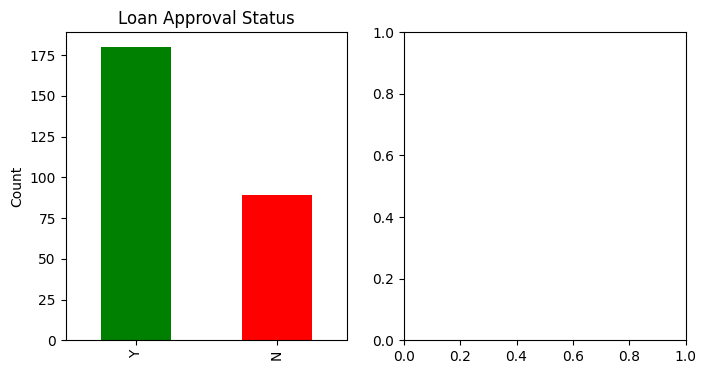

In [ ]:
#Chart Plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

approved_rejected_count.plot(kind='bar', ax=ax[0], color=['green', 'red'])
ax[0].set_title('Loan Approval Status')
ax[0].set_ylabel('Count')

plt.show()

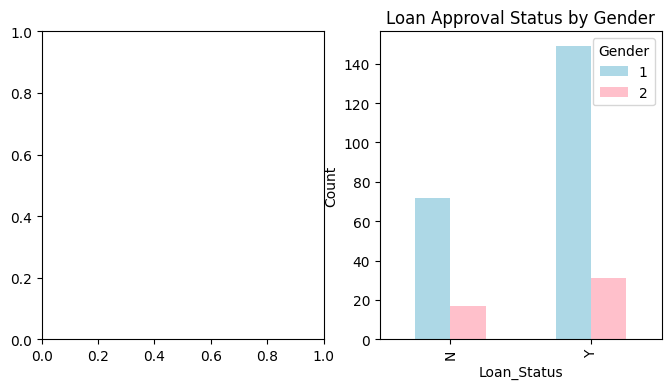

In [ ]:
#Chart Plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

gender_approval_count.plot(kind='bar', ax=ax[1], color=['lightblue', 'pink'])
ax[1].set_title('Loan Approval Status by Gender')
ax[1].set_ylabel('Count')

plt.show()

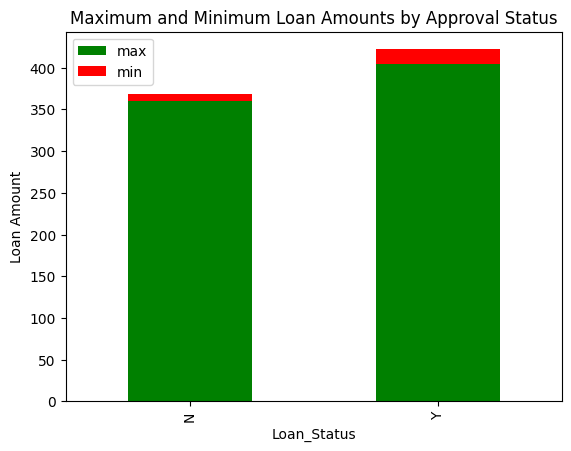

In [ ]:
# Maximum and Minimum of amounts loaned
max_min_loan_amount = combined_loan_file.groupby('Loan_Status')['LoanAmount'].agg(['max', 'min'])

# Chart Plot
max_min_loan_amount.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Maximum and Minimum Loan Amounts by Approval Status')
plt.ylabel('Loan Amount')
plt.show()

<ipython-input-27-44ccd668a215>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Self-Employed Approval (%)'], y=[self_employed_approval_percentage], palette='viridis')


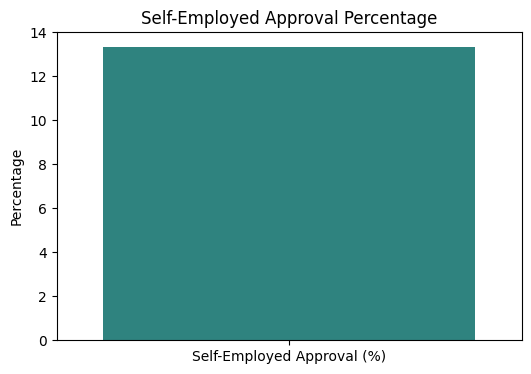

In [ ]:
# Number of self-employed approved loan

self_employed_approval_percentage = (combined_loan_file[combined_loan_file['Loan_Status'] == 'Y']['Self_Employed'].sum() /
                                      combined_loan_file['Loan_Status'].value_counts()['Y']) * 100

# Chart Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=['Self-Employed Approval (%)'], y=[self_employed_approval_percentage], palette='viridis')
plt.title('Self-Employed Approval Percentage')
plt.ylabel('Percentage')
plt.show()

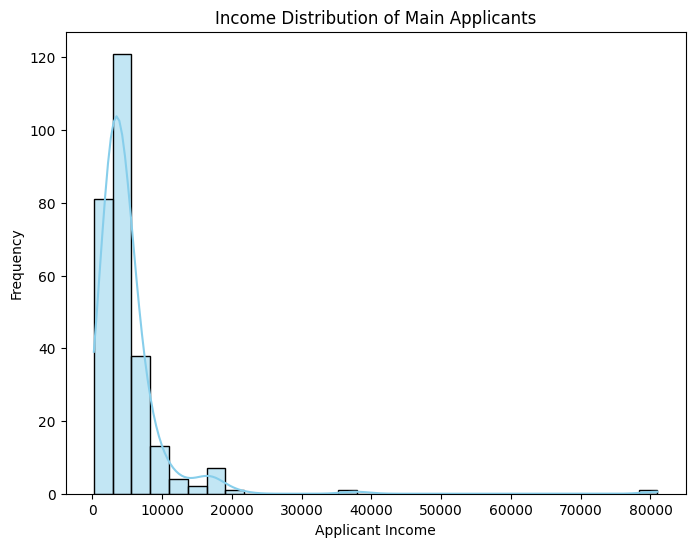

In [ ]:
# Main applicants income distribution
income_distribution = combined_loan_file['ApplicantIncome']

# Chart Plot
plt.figure(figsize=(8, 6))
sns.histplot(income_distribution, kde=True, bins=30, color='skyblue')
plt.title('Income Distribution of Main Applicants')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Top ten applicants by loan amount
top_ten_applicants = combined_loan_file.nlargest(10, 'LoanAmount')

# Displaying the result
print("Top Ten Applicants by Loan Amount:")
print(top_ten_applicants[['LoanAmount', 'ApplicantIncome', 'Loan_Status']])

Top Ten Applicants by Loan Amount:
     LoanAmount  ApplicantIncome Loan_Status
65          405            12876           Y
158         400            17500           Y
42          360            81000           N
233         350              416           N
9           349            12841           N
20          333            20667           N
41          333             2000           N
68          333            10047           Y
70          333             2213           Y
112         333             2947           N


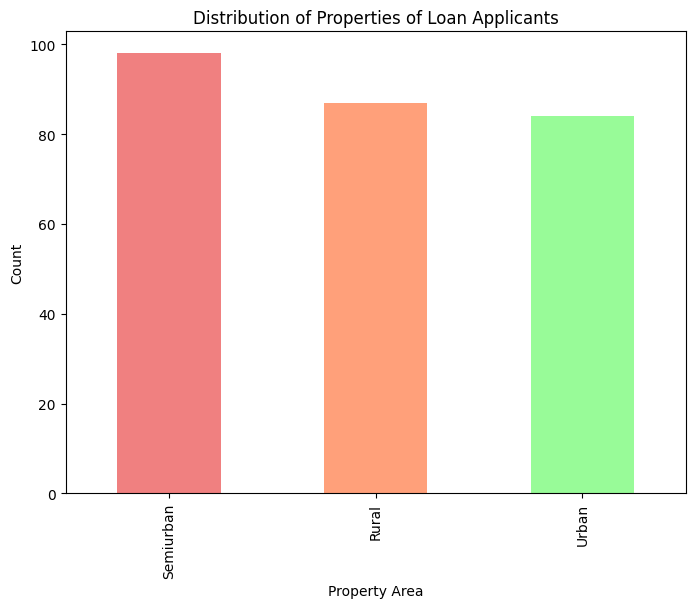

In [ ]:
# Chart showing Properties (rural, urban etc) Distribution of all loan applicants
property_distribution = combined_loan_file['Property_Area'].map({1: 'Urban', 2: 'Semiurban', 3: 'Rural'})

# Chart Plot
plt.figure(figsize=(8, 6))
property_distribution.value_counts().plot(kind='bar', color=['lightcoral', 'lightsalmon', 'palegreen'])
plt.title('Distribution of Properties of Loan Applicants')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()